In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer


###To predict whether a client will subscribe to a term deposit based on the bank's marketing campaigns, we can use a machine learning algorithm such as logistic regression, decision tree, or random forest. Here are the steps to build a predictive model using ROC-AUC for evaluation:###

#Load Data

In [ ]:
Data=pd.read_csv('preprocessed_data_Assignment_2.csv')

In [ ]:
Data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
2,55,5,1,0,0,0,0,0,3,1,550,1,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,1,0
4,55,5,0,6,0,0,0,0,4,3,368,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,1,0,0,3,3,192,1,1,0
32946,52,9,1,5,0,1,0,0,7,0,64,1,0,0
32947,54,0,1,2,0,0,1,0,3,1,131,4,1,0
32948,29,0,1,6,0,0,0,1,6,0,165,1,1,0


In [ ]:
Data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
2,55,5,1,0,0,0,0,0,3,1,550,1,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,1,0
4,55,5,0,6,0,0,0,0,4,3,368,2,1,0


In [ ]:
Data.dtypes

age            int64
job            int64
marital        int64
education      int64
default        int64
housing        int64
loan           int64
contact        int64
month          int64
day_of_week    int64
duration       int64
campaign       int64
poutcome       int64
y              int64
dtype: object

**Find the number of records and columns**

In [ ]:
Data.shape

(32950, 14)

**Use the .info() method to find the number of Non Null entries and Data Type of each feature**

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          32950 non-null  int64
 1   job          32950 non-null  int64
 2   marital      32950 non-null  int64
 3   education    32950 non-null  int64
 4   default      32950 non-null  int64
 5   housing      32950 non-null  int64
 6   loan         32950 non-null  int64
 7   contact      32950 non-null  int64
 8   month        32950 non-null  int64
 9   day_of_week  32950 non-null  int64
 10  duration     32950 non-null  int64
 11  campaign     32950 non-null  int64
 12  poutcome     32950 non-null  int64
 13  y            32950 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [ ]:
Data.duplicated().sum()

55

In [ ]:
# check for missing values
print(Data.isnull().sum())

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
poutcome       0
y              0
dtype: int64


In [ ]:
# check the data types
print(Data.dtypes)

age            int64
job            int64
marital        int64
education      int64
default        int64
housing        int64
loan           int64
contact        int64
month          int64
day_of_week    int64
duration       int64
campaign       int64
poutcome       int64
y              int64
dtype: object


In [ ]:
# describe the numerical variables
Data.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,39.605584,3.634901,1.169408,3.706434,0.000091,0.547800,0.152443,0.365463,4.233414,2.000546,227.795357,2.189469,0.929469,0.112656
std,9.079007,3.548829,0.603146,2.081246,0.009542,0.497717,0.359455,0.481567,2.319693,1.400260,158.757258,1.362850,0.364187,0.316176
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,1.000000,0.000000,0.000000
25%,32.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,103.000000,1.000000,1.000000,0.000000
50%,38.000000,2.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,4.000000,2.000000,180.000000,2.000000,1.000000,0.000000
75%,47.000000,7.000000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,319.000000,3.000000,1.000000,0.000000
max,55.000000,10.000000,2.000000,6.000000,1.000000,1.000000,1.000000,1.000000,9.000000,4.000000,550.000000,5.000000,2.000000,1.000000


In [ ]:
Data.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
age,1.000000,-0.021699,-0.405322,-0.121362,0.002867,-0.003995,-0.003012,0.024952,-0.033614,-0.022997,-0.000494,0.007063,0.018417,-0.006153
job,-0.021699,1.000000,0.028103,0.131251,0.015322,0.009210,-0.013945,-0.031371,-0.027566,-0.002116,-0.005580,-0.008350,0.006446,0.025676
marital,-0.405322,0.028103,1.000000,0.111112,-0.002680,0.017711,0.007988,-0.054023,-0.005747,0.002693,0.006257,-0.005635,0.004104,0.049361
education,-0.121362,0.131251,0.111112,1.000000,0.002874,0.022380,0.010166,-0.109040,-0.085088,-0.016576,-0.022133,-0.000067,0.016647,0.058562
default,0.002867,0.015322,-0.002680,0.002874,1.000000,-0.004112,-0.004047,-0.007242,-0.005074,0.006811,-0.007481,-0.005995,-0.006886,-0.003400
housing,-0.003995,0.009210,0.017711,0.022380,-0.004112,1.000000,0.037050,-0.078204,-0.016748,0.003664,-0.011294,-0.011987,-0.015725,0.009753
loan,-0.003012,-0.013945,0.007988,0.010166,-0.004047,0.037050,1.000000,-0.014854,-0.008315,-0.012768,-0.003653,0.012719,-0.002950,-0.000499
contact,0.024952,-0.031371,-0.054023,-0.109040,-0.007242,-0.078204,-0.014854,1.000000,0.275416,-0.007182,-0.034666,0.065177,0.121541,-0.143238
month,-0.033614,-0.027566,-0.005747,-0.085088,-0.005074,-0.016748,-0.008315,0.275416,1.000000,0.023675,0.009009,-0.061779,-0.065620,-0.007508
day_of_week,-0.022997,-0.002116,0.002693,-0.016576,0.006811,0.003664,-0.012768,-0.007182,0.023675,1.000000,0.031457,-0.053507,0.014240,0.011926


In [ ]:
# check the distribution of the target variable
print(Data['y'].value_counts(normalize=True))

0    0.887344
1    0.112656
Name: y, dtype: float64


# Define the Variable

In [ ]:
y = Data["y"]
Data = Data.drop(["y"], axis=1)

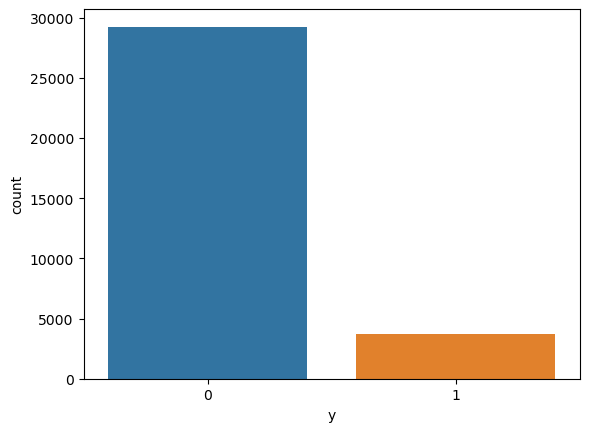

In [ ]:
# visualize the distribution of the target variable
sns.countplot(x=y)
plt.show()

In [ ]:
# # visualize the distribution of the target variable
# sns.countplot(x='y', data=Data)
# plt.show()

In [ ]:


# plt.bar(Data['y'].value_counts().index, Data['y'].value_counts(normalize=True))
# plt.title("Distribution of target variable")
# plt.xlabel("Target variable")
# plt.ylabel("Proportion")
# plt.show()

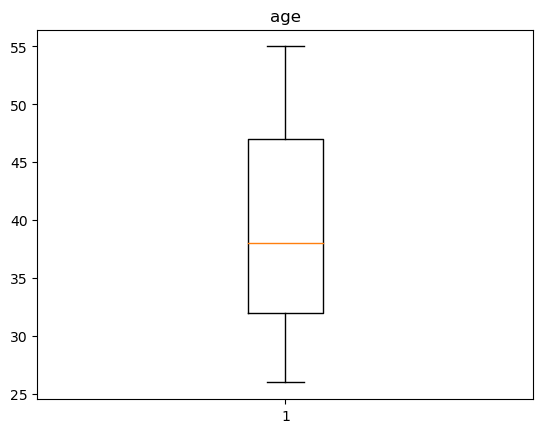

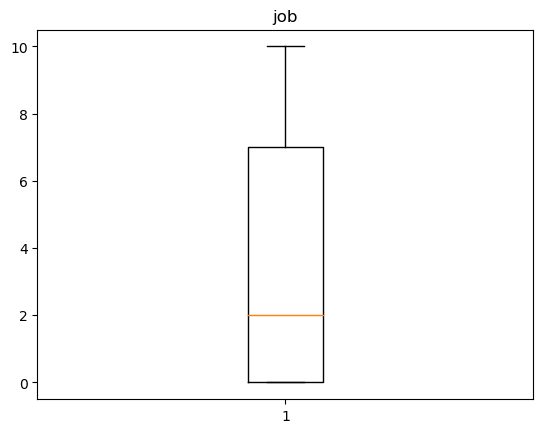

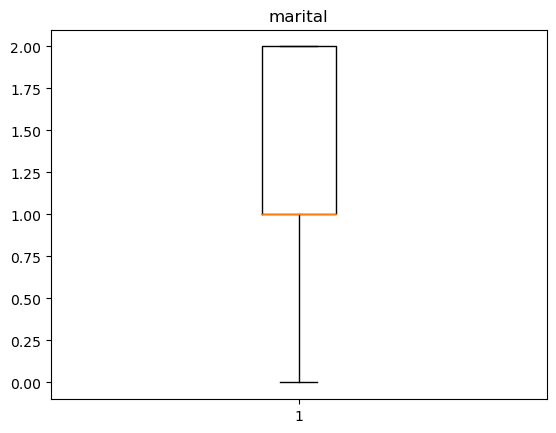

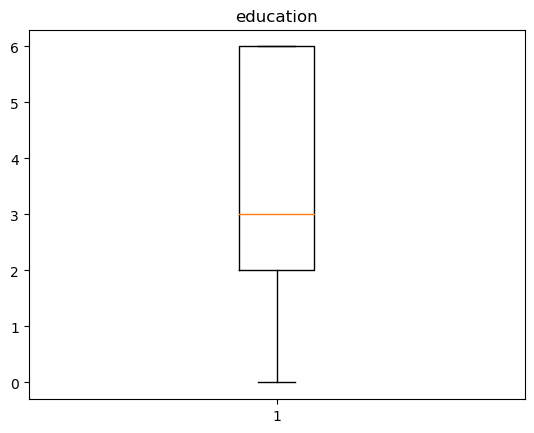

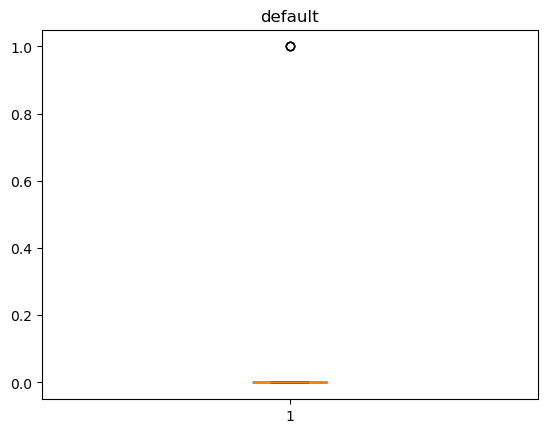

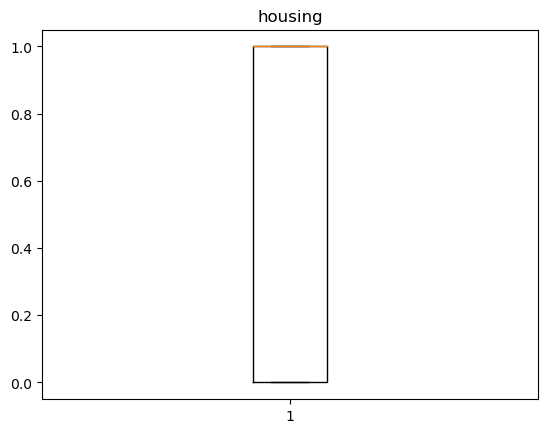

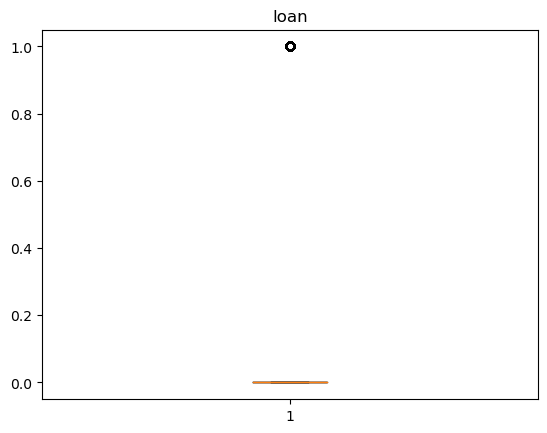

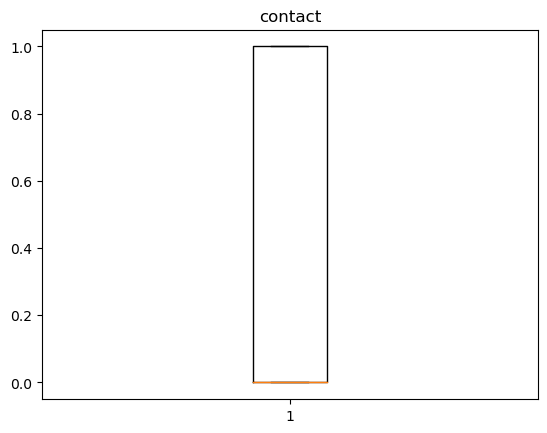

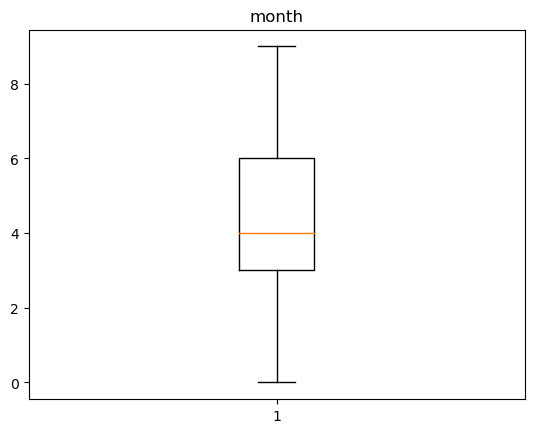

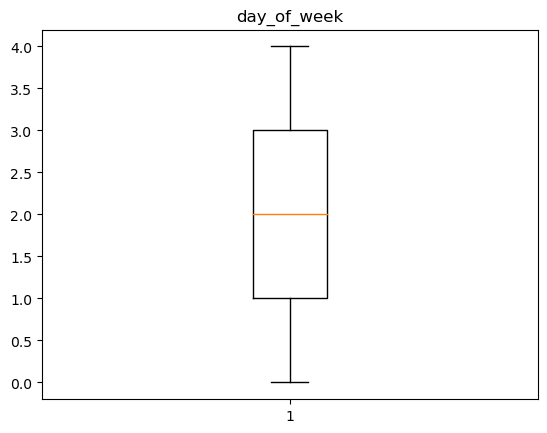

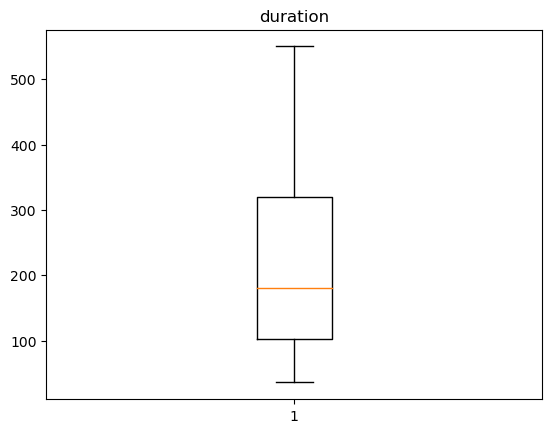

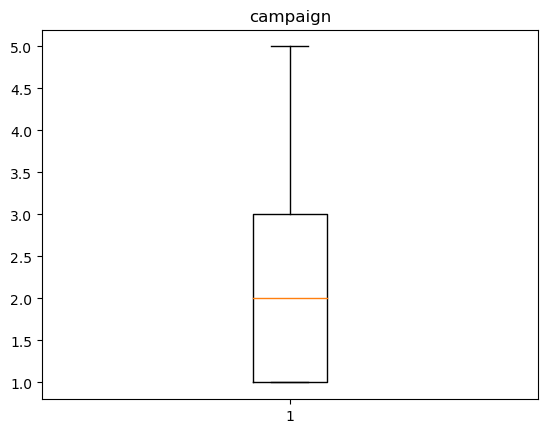

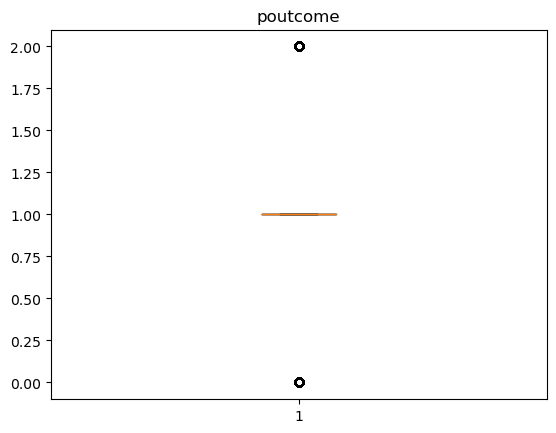

In [ ]:
for column in Data.columns:
    fig, ax = plt.subplots()
    ax.boxplot(Data[column])
    ax.set_title(column)
    plt.show()

# Data preprocessing

In [ ]:
# Define a function to detect outliers for a given column
def detect_outliers(data):
    # Calculate the IQR
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    
    # Calculate the upper and lower bounds
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    # Identify the outliers
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Return True if outliers are present, False otherwise
    return bool(outliers)

# Detect outliers for each column in the dataset
outlier_columns = []
for column in Data.columns:
    if detect_outliers(Data[column].values):
        outlier_columns.append(column)

# Print the names of the columns that contain outliers
if outlier_columns:
    print(f"The following columns contain outliers: {', '.join(outlier_columns)}")
else:
    print("No outliers detected in any column.")

The following columns contain outliers: default, loan, poutcome


In [ ]:
# Remove outliers for each column that contains them
for column in outlier_columns:
    # Calculate the IQR
    q1, q3 = np.percentile(Data[column], [25, 75])
    iqr = q3 - q1
    
    # Calculate the upper and lower bounds
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    # Replace outliers with NaN
    Data.loc[(Data[column] < lower_bound) | (Data[column] > upper_bound), column] = np.nan
    

In [ ]:
# Impute missing values using KNN imputer
imputer = KNNImputer(n_neighbors=5, weights='distance')
Data = pd.DataFrame(imputer.fit_transform(Data), columns=Data.columns)

In [ ]:
Data.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.0,32950.000000,32950.0,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.0
mean,39.605584,3.634901,1.169408,3.706434,0.0,0.547800,0.0,0.365463,4.233414,2.000546,227.795357,2.189469,1.0
std,9.079007,3.548829,0.603146,2.081246,0.0,0.497717,0.0,0.481567,2.319693,1.400260,158.757258,1.362850,0.0
min,26.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,36.000000,1.000000,1.0
25%,32.000000,0.000000,1.000000,2.000000,0.0,0.000000,0.0,0.000000,3.000000,1.000000,103.000000,1.000000,1.0
50%,38.000000,2.000000,1.000000,3.000000,0.0,1.000000,0.0,0.000000,4.000000,2.000000,180.000000,2.000000,1.0
75%,47.000000,7.000000,2.000000,6.000000,0.0,1.000000,0.0,1.000000,6.000000,3.000000,319.000000,3.000000,1.0
max,55.000000,10.000000,2.000000,6.000000,0.0,1.000000,0.0,1.000000,9.000000,4.000000,550.000000,5.000000,1.0


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          32950 non-null  float64
 1   job          32950 non-null  float64
 2   marital      32950 non-null  float64
 3   education    32950 non-null  float64
 4   default      32950 non-null  float64
 5   housing      32950 non-null  float64
 6   loan         32950 non-null  float64
 7   contact      32950 non-null  float64
 8   month        32950 non-null  float64
 9   day_of_week  32950 non-null  float64
 10  duration     32950 non-null  float64
 11  campaign     32950 non-null  float64
 12  poutcome     32950 non-null  float64
dtypes: float64(13)
memory usage: 3.3 MB


In [ ]:
Data.shape

(32950, 13)

In [ ]:
# Data = Data.drop_duplicates()

In [ ]:
# Data = Data.dropna()

In [ ]:
Data = pd.get_dummies(Data, columns=["education", "marital", "contact", "month", "day_of_week", "poutcome"])

In [ ]:
Data

,age,job,default,housing,loan,duration,campaign,education_0.0,education_1.0,education_2.0,...,month_6.0,month_7.0,month_8.0,month_9.0,day_of_week_0.0,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,poutcome_1.0
0,49.0,1.0,0.0,0.0,0.0,227.0,4.0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
1,37.0,2.0,0.0,0.0,0.0,202.0,2.0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
2,55.0,5.0,0.0,0.0,0.0,550.0,1.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,36.0,0.0,0.0,1.0,0.0,120.0,2.0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,55.0,5.0,0.0,0.0,0.0,368.0,2.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28.0,7.0,0.0,1.0,0.0,192.0,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32946,52.0,9.0,0.0,1.0,0.0,64.0,1.0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
32947,54.0,0.0,0.0,0.0,0.0,131.0,4.0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
32948,29.0,0.0,0.0,0.0,0.0,165.0,1.0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


# Feature engineering

In [ ]:
Data.columns

Index(['age', 'job', 'default', 'housing', 'loan', 'duration', 'campaign',
       'education_0.0', 'education_1.0', 'education_2.0', 'education_3.0',
       'education_4.0', 'education_5.0', 'education_6.0', 'marital_0.0',
       'marital_1.0', 'marital_2.0', 'contact_0.0', 'contact_1.0', 'month_0.0',
       'month_1.0', 'month_2.0', 'month_3.0', 'month_4.0', 'month_5.0',
       'month_6.0', 'month_7.0', 'month_8.0', 'month_9.0', 'day_of_week_0.0',
       'day_of_week_1.0', 'day_of_week_2.0', 'day_of_week_3.0',
       'day_of_week_4.0', 'poutcome_1.0'],
      dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
X = Data

In [ ]:
y = y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use standardization for feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)

In [ ]:
X_test=sc.transform(X_test)

# Model selection

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
auc_score = roc_auc_score(y_test, y_pred)

In [ ]:
print("ROC-AUC Score:", auc_score)

ROC-AUC Score: 0.6347022745565346


# ROC-AUC Score with hypermeter 

In [ ]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc")
print(f"Cross-validation scores: {scores}")
print(f"Mean ROC-AUC: {np.mean(scores):.3f}")

Cross-validation scores: [0.8846187  0.88579775 0.88110675 0.90273311 0.86943164]
Mean ROC-AUC: 0.885


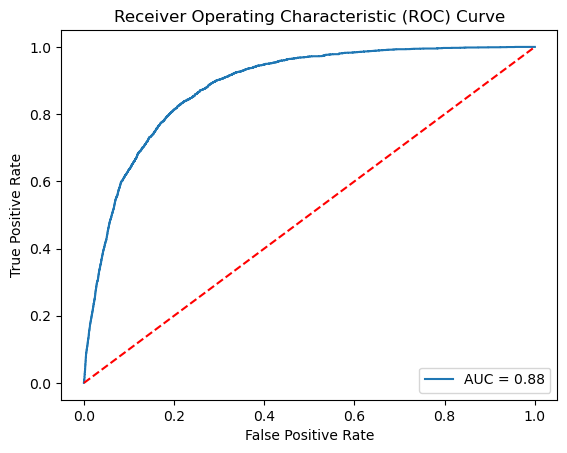

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict

# Generate predicted probabilities using cross-validation
y_pred_proba = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')

# Compute the false positive rate, true positive rate, and threshold
fpr, tpr, threshold = roc_curve(y_train, y_pred_proba[:, 1])

# Compute the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')

# Plot the diagonal line (random guessing)
plt.plot([0, 1], [0, 1], 'r--')

# Set the x- and y-axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the title of the plot
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Set the legend of the plot
plt.legend(loc='lower right')

# Show the plot
plt.show()

# Find out the accuracy

In [ ]:
threshold = 0.5
# Convert predicted probabilities to binary values
y_pred_binary = np.where(y_pred >= threshold, 1, 0)
accuracy_score(y_test, y_pred_binary)

0.8895295902883156

# Create the classification report and understand each term in it

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5798
           1       0.58      0.30      0.39       792

    accuracy                           0.89      6590
   macro avg       0.74      0.63      0.67      6590
weighted avg       0.87      0.89      0.87      6590



# Compare roc_auc_score LogisticRegression with RandomForestClassifier

In [ ]:
# Importing the required libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Creating a list of models to be trained
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))

# Training the models and evaluating their performance
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred)
    results.append(auc)
    names.append(name)


In [ ]:
for i in range(len(names)):
    print(names[i], ":", results[i])

Logistic Regression : 0.8716673678837356
Random Forest : 0.8953040451078568


# With hypermeter accuracy_score, precision_score, recall_score, f1_score Compare LogisticRegression with RandomForestClassifier

In [ ]:
X = X
y = y

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = clf.predict_proba(X_test)[:,1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC-AUC:', roc_auc)

ROC-AUC: 0.8966303688837322


In [ ]:
# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Define hyperparameters for Grid Search
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, 20]}
}

# Train and evaluate models using cross-validation
for name, model in models.items():
    print(name)
    # Find best hyperparameters using Grid Search
    grid = GridSearchCV(model, param_grid[name], cv=5)
    grid.fit(X_train, y_train)
    print('Best hyperparameters:', grid.best_params_)
    # Evaluate performance using cross-validation
    scores = cross_val_score(grid.best_estimator_, X_train, y_train, cv=5)
    print('Cross-validation scores:', scores)
    print('Mean cross-validation score:', scores.mean())
    # Make predictions on test set and evaluate performance
    y_pred = grid.best_estimator_.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1-score:', f1_score(y_test, y_pred))
    print()

Logistic Regression
Best hyperparameters: {'C': 0.1}
Cross-validation scores: [0.8983308  0.89188164 0.89662367 0.89946889 0.8943475 ]
Mean cross-validation score: 0.8961305007587252
Accuracy: 0.8839150227617603
Precision: 0.5434083601286174
Recall: 0.21338383838383837
F1-score: 0.30643699002719854

Random Forest
Best hyperparameters: {'max_depth': 20, 'n_estimators': 500}
Cross-validation scores: [0.89586495 0.89150228 0.89377845 0.8983308  0.89567527]
Mean cross-validation score: 0.8950303490136571
Accuracy: 0.8893778452200304
Precision: 0.576271186440678
Recall: 0.3005050505050505
F1-score: 0.39502074688796684

